# OPERATING EXPENSES BY FUNCTION 

In [24]:
import pandas as pd
import numpy as np
from plotnine import *

In [75]:
data=pd.read_csv('Operating_expenses_By_Function_2023.csv')

In [76]:
data.head()

,agency,city,state,ntd_id,organization_type,reporter_type,report_year,uace_code,uza_name,primary_uza_population,...,facility_maintenance,facility_maintenance_1,general_administration,general_administration_1,reduced_reporter_expenses,reduced_reporter_expenses_1,total,total_questionable,separate_report_amount,separate_report_amount_1
0,MTA New York City Transit,Brooklyn,NY,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,2023,63217.0,"New York--Jersey City--Newark, NY--NJ",19426449.0,...,2363284046,NaN,1014596199,NaN,0,NaN,6047953647,NaN,0,NaN
1,MTA New York City Transit,Brooklyn,NY,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,2023,63217.0,"New York--Jersey City--Newark, NY--NJ",19426449.0,...,184737190,NaN,589349975,NaN,0,NaN,3118485221,NaN,0,NaN
2,MTA New York City Transit,Brooklyn,NY,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,2023,63217.0,"New York--Jersey City--Newark, NY--NJ",19426449.0,...,13317983,NaN,185497525,NaN,0,NaN,564652967,NaN,0,NaN
3,MTA New York City Transit,Brooklyn,NY,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,2023,63217.0,"New York--Jersey City--Newark, NY--NJ",19426449.0,...,16870026,NaN,53827981,NaN,0,NaN,284777119,NaN,0,NaN
4,MTA New York City Transit,Brooklyn,NY,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,2023,63217.0,"New York--Jersey City--Newark, NY--NJ",19426449.0,...,6664701,NaN,21265375,NaN,0,NaN,112504538,NaN,0,NaN


# Data Description

1. **Agency**: The transit agency's name.  

2. **City**: The city in which the agency is headquartered.  

3. **State**: The state in which the agency is headquartered. 

4. **NTD ID**: A five-digit identifying number for each agency used in the current NTD system.

5. **Organization Type**: Description of the agency's legal entity.  

6. **Reporter Type**: The type of NTD report that the agency completed this year.  

7. **Report Year**: The year for which the data was reported.  

8. **UACE Code**: The UACE code remains consistent across census years. 

9. **UZA Name**: The name of an agency's Urbanized Area.

10. **primary_uza_population**: The population of the urbanized area primarily served by the agency.  

11. **Agency VOMS**: The number of revenue vehicles operated across the whole agency to meet the annual maximum service requirement. This is the revenue vehicle count during the peak season of the year, excluding atypical days and one-time special events. 

12. **Mode**: A system for carrying transit passengers described by specific right-of-way (ROW), technology, and operational features.

13. **Mode Name**: Detailed description of the system used for carrying transit passengers.  

14. **Type of Service**: Describes how public transportation services are provided by the transit agency: directly operated (DO) or purchased transportation (PT) services. 

15. **Mode VOMS**: The number of revenue vehicles operated by the given mode and type of service to meet the annual maximum service requirement.  

16. **Vehicle Operations**: The Vehicle Operations function includes wages, salaries, and expenses related to dispatching and running vehicles, including administrative support.  

17. **Vehicle Operations Questionable**: FTA marks a data point as Questionable when there is reason to believe it is incorrect, but the reporting agency has been unable to correct the data or offer an explanation.  

18. **Vehicle Maintenance**: The Vehicle Maintenance function includes wages, salaries, and expenses incurred during activities related to keeping vehicles operational and in good repair.  

19. **Vehicle Maintenance Questionable**: FTA marks a data point as Questionable when there is reason to believe it is incorrect, but the reporting agency has been unable to correct the data or offer an explanation. 

20. **Facility Maintenance**: The Facility Maintenance function includes all activities related to keeping buildings, structures, and other non-vehicle assets operational and in good repair. 

21. **Facility Maintenance Questionable**: FTA marks a data point as Questionable when there is reason to believe it is incorrect, but the reporting agency has been unable to correct the data or offer an explanation. 

22. **General Administration**: The General Administration function includes wages, salaries, and expenses incurred to perform support and administrative activities.  

23. **General Administration Questionable**: FTA marks a data point as Questionable when there is reason to believe it is incorrect, but the reporting agency has been unable to correct the data or offer an explanation.  
24. **Reduced Reporter Expenses**: Reduced Reporters and Rural Reporters report only the total operating expenses by mode and type of service without categorizing them further.  

25. **Reduced Reporter Expenses Questionable**: FTA marks a data point as Questionable when there is reason to believe it is incorrect, but the reporting agency has been unable to correct the data or offer an explanation.  
26. **Total**: The total of the operating expenses reported in previous columns. Does not include Purchased Transportation Reported Separately.  

27. **Total Questionable**: FTA marks a data point as Questionable when there is reason to believe it is incorrect, but the reporting agency has been unable to correct the data or offer an explanation.  

28. **Purchased Transportation Reported Separately**: Payments or accruals to sellers/providers of services excluded from the Total column to avoid double counting.

29. **Purchased Transportation Reported Separately Questionable**: FTA marks a data point as Questionable when there is reason to believe it is incorrect, but the reporting agency has been unable to correct the data or offer an explanation.  

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   agency                       1000 non-null   object 
 1   city                         995 non-null    object 
 2   state                        1000 non-null   object 
 3   ntd_id                       1000 non-null   int64  
 4   organization_type            1000 non-null   object 
 5   reporter_type                1000 non-null   object 
 6   report_year                  1000 non-null   int64  
 7   uace_code                    896 non-null    float64
 8   uza_name                     896 non-null    object 
 9   primary_uza_population       896 non-null    float64
 10  agency_voms                  1000 non-null   int64  
 11  mode                         1000 non-null   object 
 12  mode_name                    1000 non-null   object 
 13  type_of_service    

In [78]:
data.isnull().sum()

agency                            0
city                              5
state                             0
ntd_id                            0
organization_type                 0
reporter_type                     0
report_year                       0
uace_code                       104
uza_name                        104
primary_uza_population          104
agency_voms                       0
mode                              0
mode_name                         0
type_of_service                   0
mode_voms                         0
vehicle_operations                0
vehicle_operations_1           1000
vehicle_maintenance               0
vehicle_maintenance_1          1000
facility_maintenance              0
facility_maintenance_1         1000
general_administration            0
general_administration_1       1000
reduced_reporter_expenses         0
reduced_reporter_expenses_1    1000
total                             0
total_questionable             1000
separate_report_amount      

In [79]:
data['mode_name']

0             Heavy Rail
1                    Bus
2        Demand Response
3           Commuter Bus
4      Bus Rapid Transit
             ...        
995                  Bus
996      Demand Response
997                  Bus
998         Commuter Bus
999         Commuter Bus
Name: mode_name, Length: 1000, dtype: object

In [80]:
data = data.drop(columns=[col for col in data.columns if "_1" in col or "questionable" in col])

In [81]:
data.isnull().sum()

agency                         0
city                           5
state                          0
ntd_id                         0
organization_type              0
reporter_type                  0
report_year                    0
uace_code                    104
uza_name                     104
primary_uza_population       104
agency_voms                    0
mode                           0
mode_name                      0
type_of_service                0
mode_voms                      0
vehicle_operations             0
vehicle_maintenance            0
facility_maintenance           0
general_administration         0
reduced_reporter_expenses      0
total                          0
separate_report_amount         0
dtype: int64

# EDA

## 1.Total Expenses by Mode

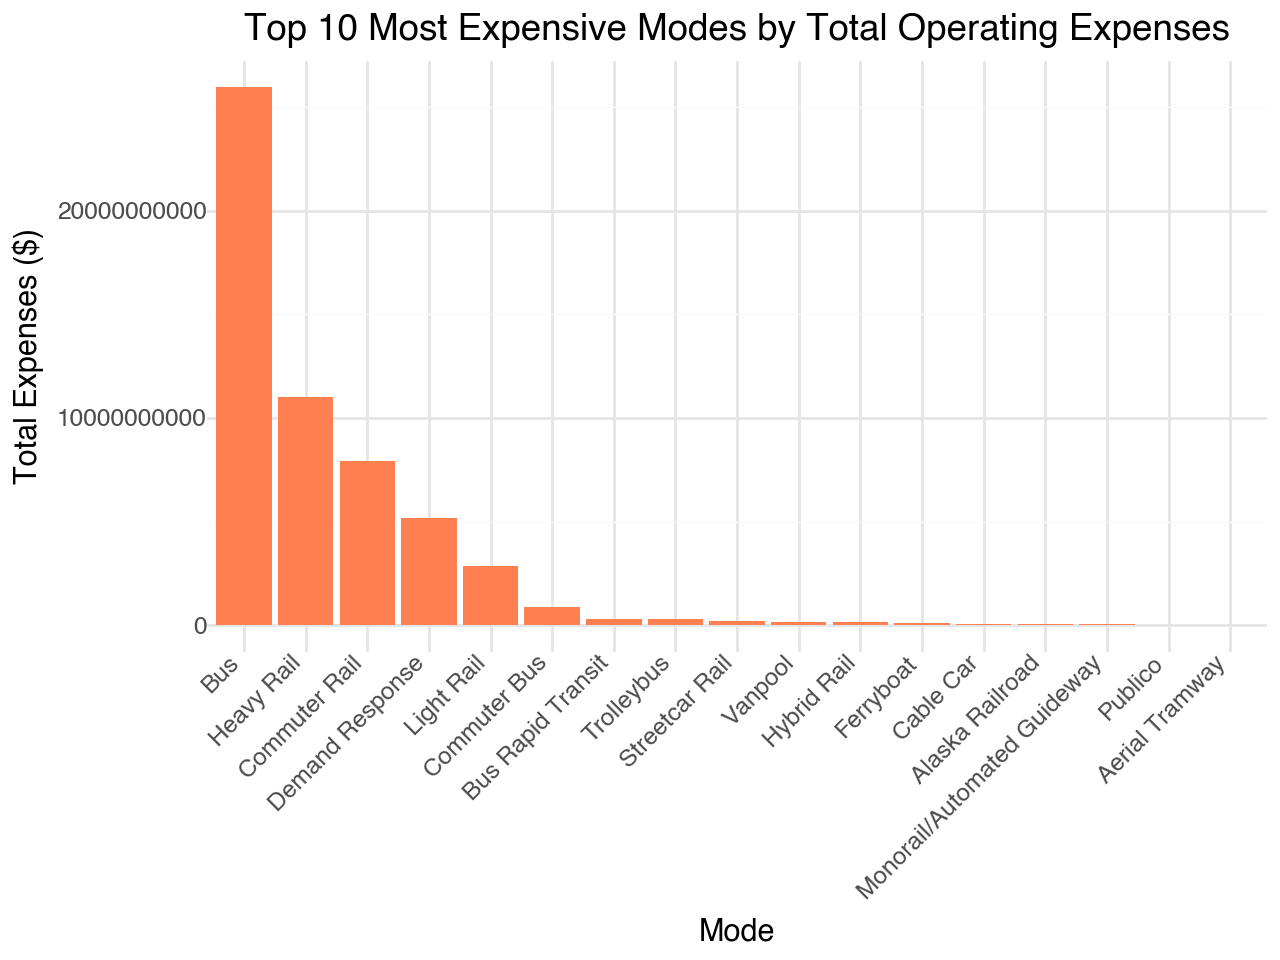

In [42]:
top_expenses_by_mode = (
    total_expenses_by_mode.sort_values(by="total", ascending=False).head(17)
)

plot1 = (
    ggplot(top_expenses_by_mode, aes(x="reorder(mode_name, -total)", y="total")) +
    geom_bar(stat="identity", fill="coral") +
    labs(title="Top 10 Most Expensive Modes by Total Operating Expenses", 
         x="Mode", y="Total Expenses ($)") +
    theme_minimal() +
    theme(axis_text_x=element_text(angle=45, hjust=1))  
)

plot1.show()

In [29]:
total_expenses_by_mode.sort_values(by="total", ascending=False)

,mode_name,total
2,Bus,25944116232
9,Heavy Rail,11003248769
6,Commuter Rail,7928178131
7,Demand Response,5148868499
12,Light Rail,2873084171
5,Commuter Bus,858295618
3,Bus Rapid Transit,314432773
16,Trolleybus,312440521
15,Streetcar Rail,214713764
17,Vanpool,168410086


## 2.Population vs Total Expenses

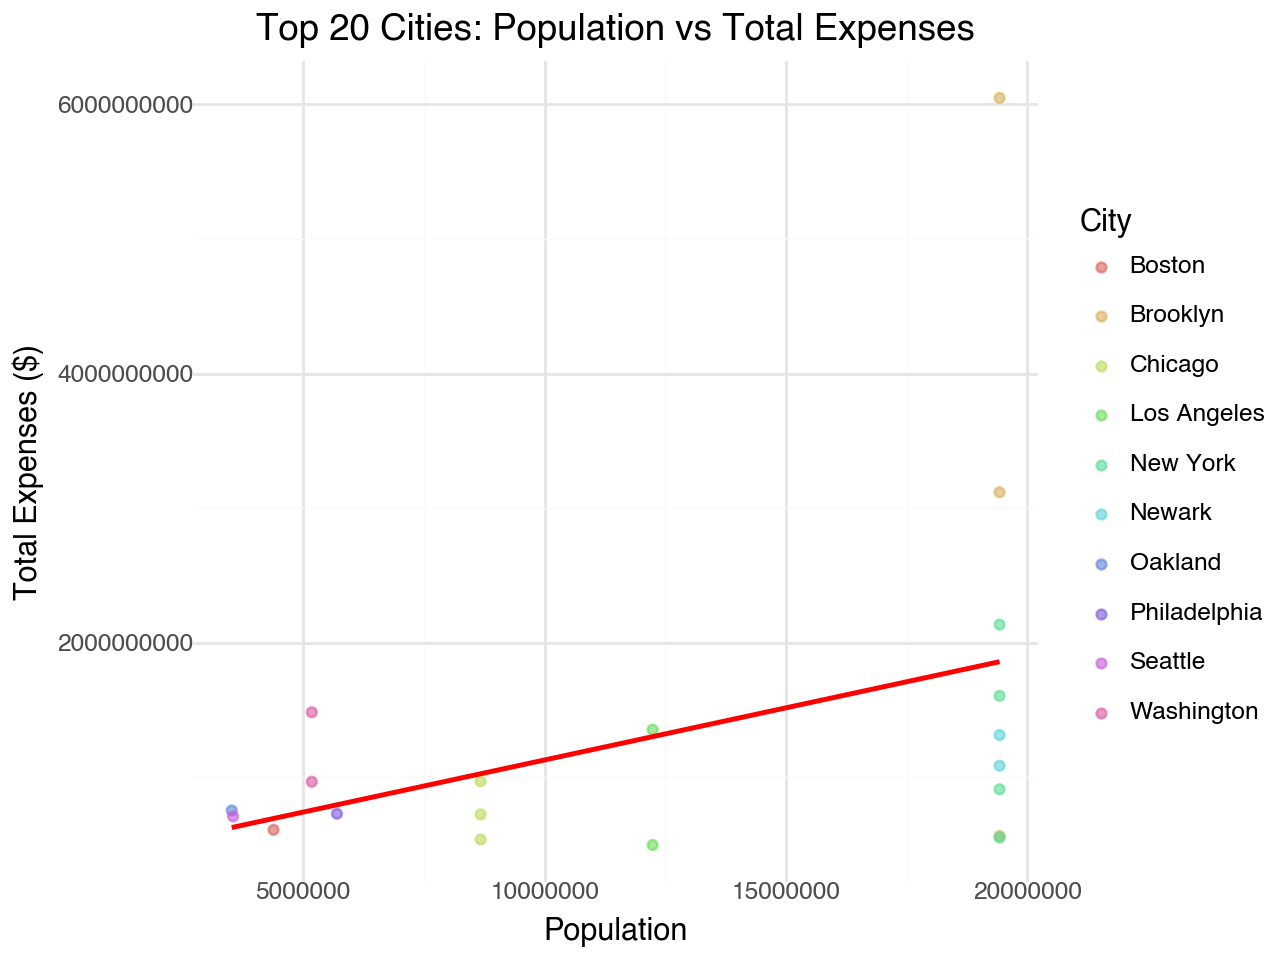

In [36]:
top_20_data = data.sort_values("total", ascending=False).head(20)

plot2 = (
    ggplot(top_20_data, aes(x="primary_uza_population", y="total", color="city")) +
    geom_point(alpha=0.6) +
    geom_smooth(method="lm", color="red", se=False) +
    labs(
        title="Top 20 Cities: Population vs Total Expenses", 
        x="Population", 
        y="Total Expenses ($)", 
        color="City"
    ) +
    theme_minimal()
)

plot2.show()

In [46]:
top_20_data.sort_values(by="total", ascending=False)

,agency,city,state,ntd_id,organization_type,reporter_type,report_year,uace_code,uza_name,primary_uza_population,...,mode_name,type_of_service,mode_voms,vehicle_operations,vehicle_maintenance,facility_maintenance,general_administration,reduced_reporter_expenses,total,separate_report_amount
0,MTA New York City Transit,Brooklyn,NY,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,2023,63217.0,"New York--Jersey City--Newark, NY--NJ",19426449.0,...,Heavy Rail,DO,5384,1624084504,1045988898,2363284046,1014596199,0,6047953647,0
1,MTA New York City Transit,Brooklyn,NY,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,2023,63217.0,"New York--Jersey City--Newark, NY--NJ",19426449.0,...,Bus,DO,3214,1835649901,508748155,184737190,589349975,0,3118485221,0
81,MTA Long Island Rail Road,New York,NY,20100,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,2023,63217.0,"New York--Jersey City--Newark, NY--NJ",19426449.0,...,Commuter Rail,DO,1109,774294835,517414685,515194360,328314820,0,2135218700,0
77,"Metro-North Commuter Railroad Company, dba: MT...",New York,NY,20078,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,2023,63217.0,"New York--Jersey City--Newark, NY--NJ",19426449.0,...,Commuter Rail,DO,1132,634927308,308416874,382895348,279853503,0,1606093033,0
14,Washington Metropolitan Area Transit Authority...,Washington,DC,30030,Independent Public Agency or Authority of Tran...,Full Reporter,2023,92242.0,"Washington--Arlington, DC--VA--MD",5174759.0,...,Heavy Rail,DO,904,506905414,200729788,455494513,320690155,0,1483819870,0
16,Los Angeles County Metropolitan Transportation...,Los Angeles,CA,90154,Independent Public Agency or Authority of Tran...,Full Reporter,2023,51445.0,"Los Angeles--Long Beach--Anaheim, CA",12237376.0,...,Bus,DO,1453,778748928,277288748,62776184,236272008,0,1355085868,0
6,New Jersey Transit Corporation,Newark,NJ,20080,Other Publicly-Owned or Privately Chartered Co...,Full Reporter,2023,63217.0,"New York--Jersey City--Newark, NY--NJ",19426449.0,...,Commuter Rail,DO,866,608389457,308034417,174851107,223856418,0,1315131399,0
5,New Jersey Transit Corporation,Newark,NJ,20080,Other Publicly-Owned or Privately Chartered Co...,Full Reporter,2023,63217.0,"New York--Jersey City--Newark, NY--NJ",19426449.0,...,Bus,DO,1750,585429851,241996202,22827202,236565475,0,1086818730,0
41,Chicago Transit Authority,Chicago,IL,50066,Independent Public Agency or Authority of Tran...,Full Reporter,2023,16264.0,"Chicago, IL--IN",8671746.0,...,Bus,DO,1307,648572673,180441110,31243888,110761346,0,971019017,0
13,Washington Metropolitan Area Transit Authority...,Washington,DC,30030,Independent Public Agency or Authority of Tran...,Full Reporter,2023,92242.0,"Washington--Arlington, DC--VA--MD",5174759.0,...,Bus,DO,1148,581509992,196343909,9548969,180251383,0,967654253,0


## 3.Vehicle Operations Costs by State

/Users/snehanarayanan/anaconda3/lib/python3.11/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 14 x 8 in image.
/Users/snehanarayanan/anaconda3/lib/python3.11/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: vehicle_ops_by_state.png


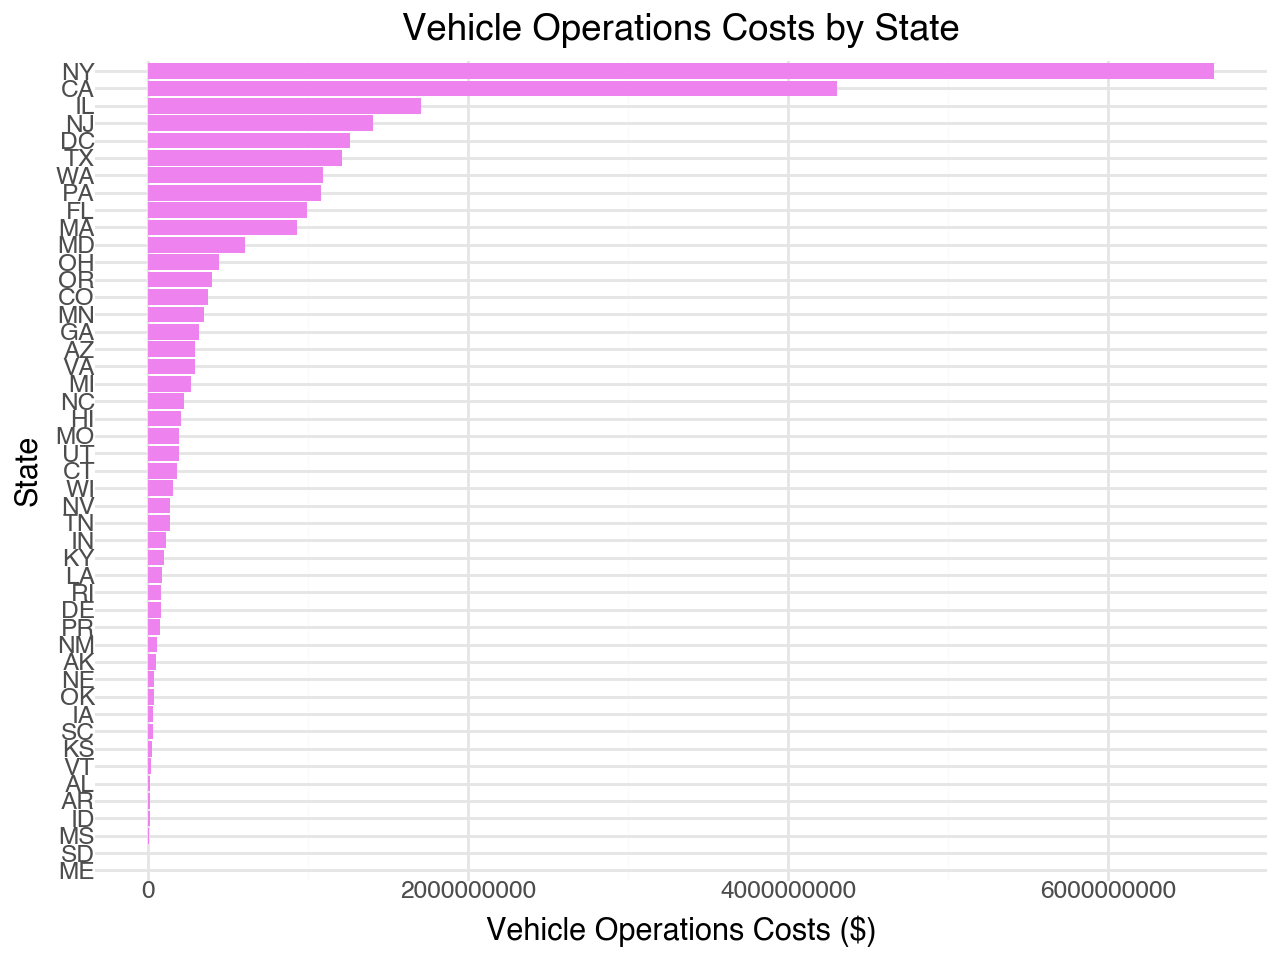

In [44]:
vehicle_ops_by_state = data.groupby("state")["vehicle_operations"].sum().reset_index()

plot3 = (
    ggplot(vehicle_ops_by_state, aes(x="reorder(state, vehicle_operations)", y="vehicle_operations")) +
    geom_bar(stat="identity", fill="violet") +
    coord_flip() + 
    labs(title="Vehicle Operations Costs by State", x="State", y="Vehicle Operations Costs ($)") +
    theme_minimal()
)

plot3.save("vehicle_ops_by_state.png", height=8, width=14, dpi=300)

plot3.show()

## 4.Total Expenses by Type of Service

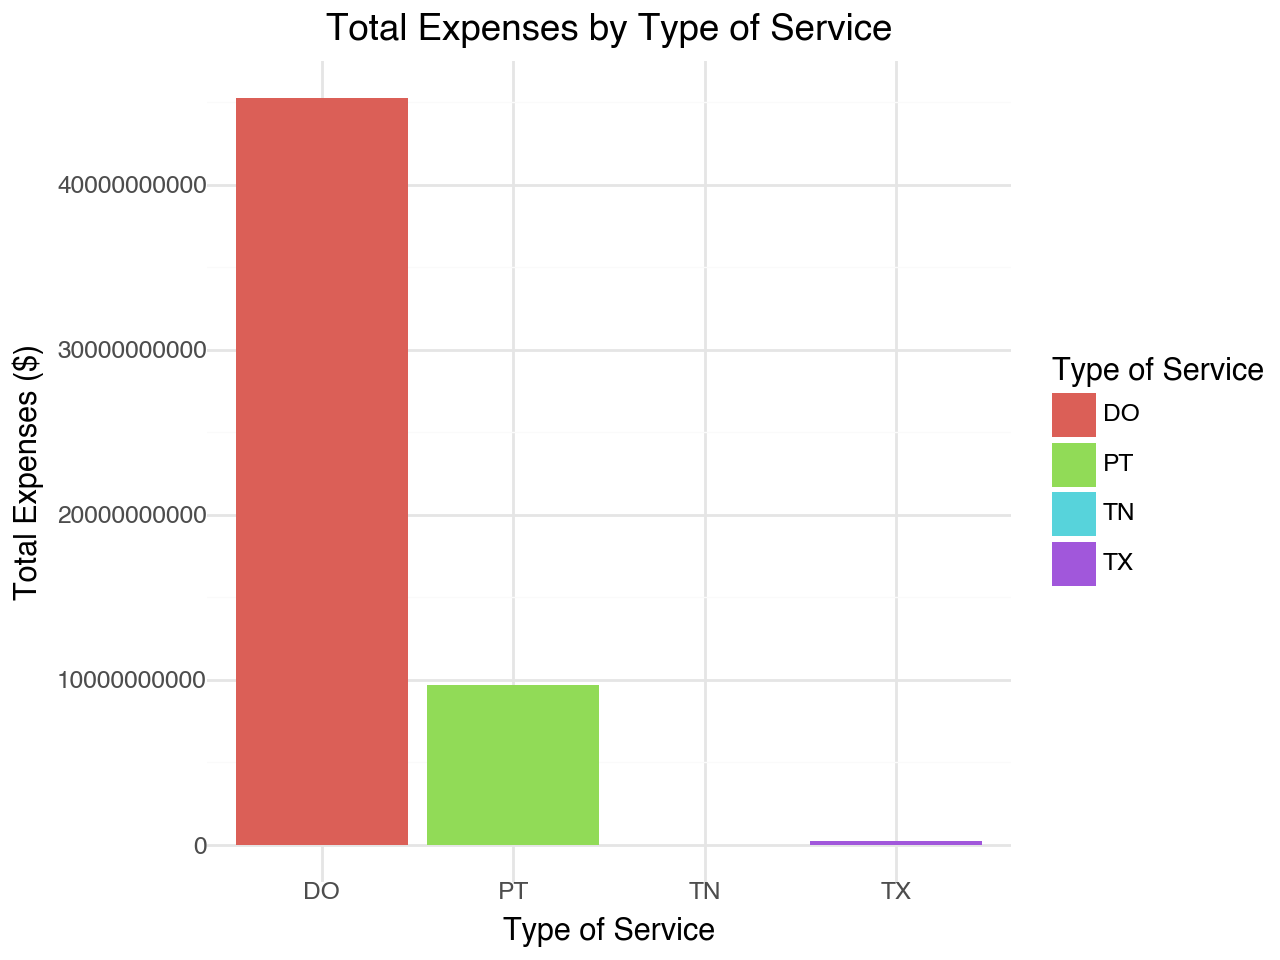

In [47]:
total_expenses_by_service = data.groupby("type_of_service")["total"].sum().reset_index()

plot4 = (
    ggplot(total_expenses_by_service, aes(x="type_of_service", y="total", fill="type_of_service")) +
    geom_bar(stat="identity") +
    labs(
        title="Total Expenses by Type of Service",
        x="Type of Service",
        y="Total Expenses ($)",
        fill="Type of Service"
    ) +
    theme_minimal()
)


plot4.show()

# Correlation Heatmap 

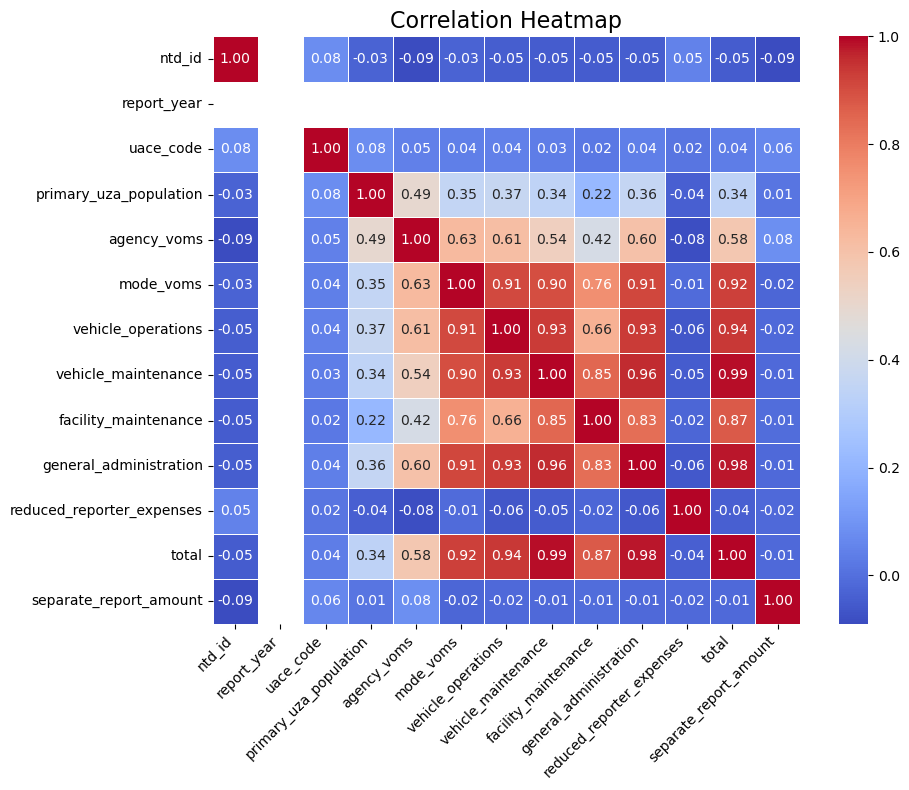

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_data = data.select_dtypes(include=[np.number])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(
    correlation_matrix,
    annot=True, 
    fmt=".2f",   
    cmap="coolwarm",  
    cbar=True,   
    square=True, 
    linewidths=0.5,  
)
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=10)  
plt.yticks(fontsize=10)  
plt.tight_layout() 
plt.show()